In [1]:
#!pip install seaborn

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
data_dir = '/home/satya/Gtsrb_clf/gtsrb/'
train_path = '/home/satya/Gtsrb_clf/gtsrb/Train'
test_path = '/home/satya/Gtsrb_clf/gtsrb/test_sorted'

In [4]:
train_csv = pd.read_csv("gtsrb/Train.csv")
test_csv = pd.read_csv("gtsrb/Test.csv")

In [5]:
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [6]:
test_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [7]:
# No of records in the dataset 
print('Length of training data', len(train_csv))
print('Length of testing data',len(test_csv))
print(f'Total Images = {len(train_csv)} + {len(test_csv)} = {len(train_csv) + len(test_csv)}')

Length of training data 39209
Length of testing data 12630
Total Images = 39209 + 12630 = 51839


In [8]:
len(train_csv.ClassId.unique())

43

In [9]:
# Output Classes in the Dataset 
len(train_csv.ClassId.value_counts())

43

In [10]:
# Checking image sizes within the classes and across the classes 
import cv2

im1 = cv2.imread('gtsrb/Train/0/00000_00000_00000.png')

im2 = cv2.imread('gtsrb/Train/0/00000_00000_00001.png')

im3 = cv2.imread('gtsrb/Train/0/00000_00000_00002.png')

im4 = cv2.imread('gtsrb/Train/0/00000_00000_00003.png')

im5 = cv2.imread('gtsrb/Train/0/00000_00000_00004.png')

# print(type(im))
# 

print('Size of image:', im1.shape)
print('Size of image:', im2.shape)
print('Size of image:', im3.shape)
print('Size of image:', im4.shape)
print('Size of image:', im5.shape)
# print(type(im.shape))

Size of image: (30, 29, 3)
Size of image: (30, 30, 3)
Size of image: (30, 30, 3)
Size of image: (31, 31, 3)
Size of image: (32, 30, 3)


In [11]:
import cv2

im6 = cv2.imread('gtsrb/Train/1/00001_00000_00000.png')

im7 = cv2.imread('gtsrb/Train/2/00002_00000_00001.png')

im8 = cv2.imread('gtsrb/Train/3/00003_00000_00002.png')

im9 = cv2.imread('gtsrb/Train/4/00004_00000_00003.png')

im10 = cv2.imread('gtsrb/Train/5/00005_00000_00004.png')

# print(type(im))
# 

print('Size of image:', im6.shape)
print('Size of image:', im7.shape)
print('Size of image:', im8.shape)
print('Size of image:', im9.shape)
print('Size of image:', im10.shape)
# print(type(im.shape))

Size of image: (57, 56, 3)
Size of image: (31, 35, 3)
Size of image: (28, 27, 3)
Size of image: (43, 44, 3)
Size of image: (32, 31, 3)


In [12]:
# Label Overview finded on internet
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

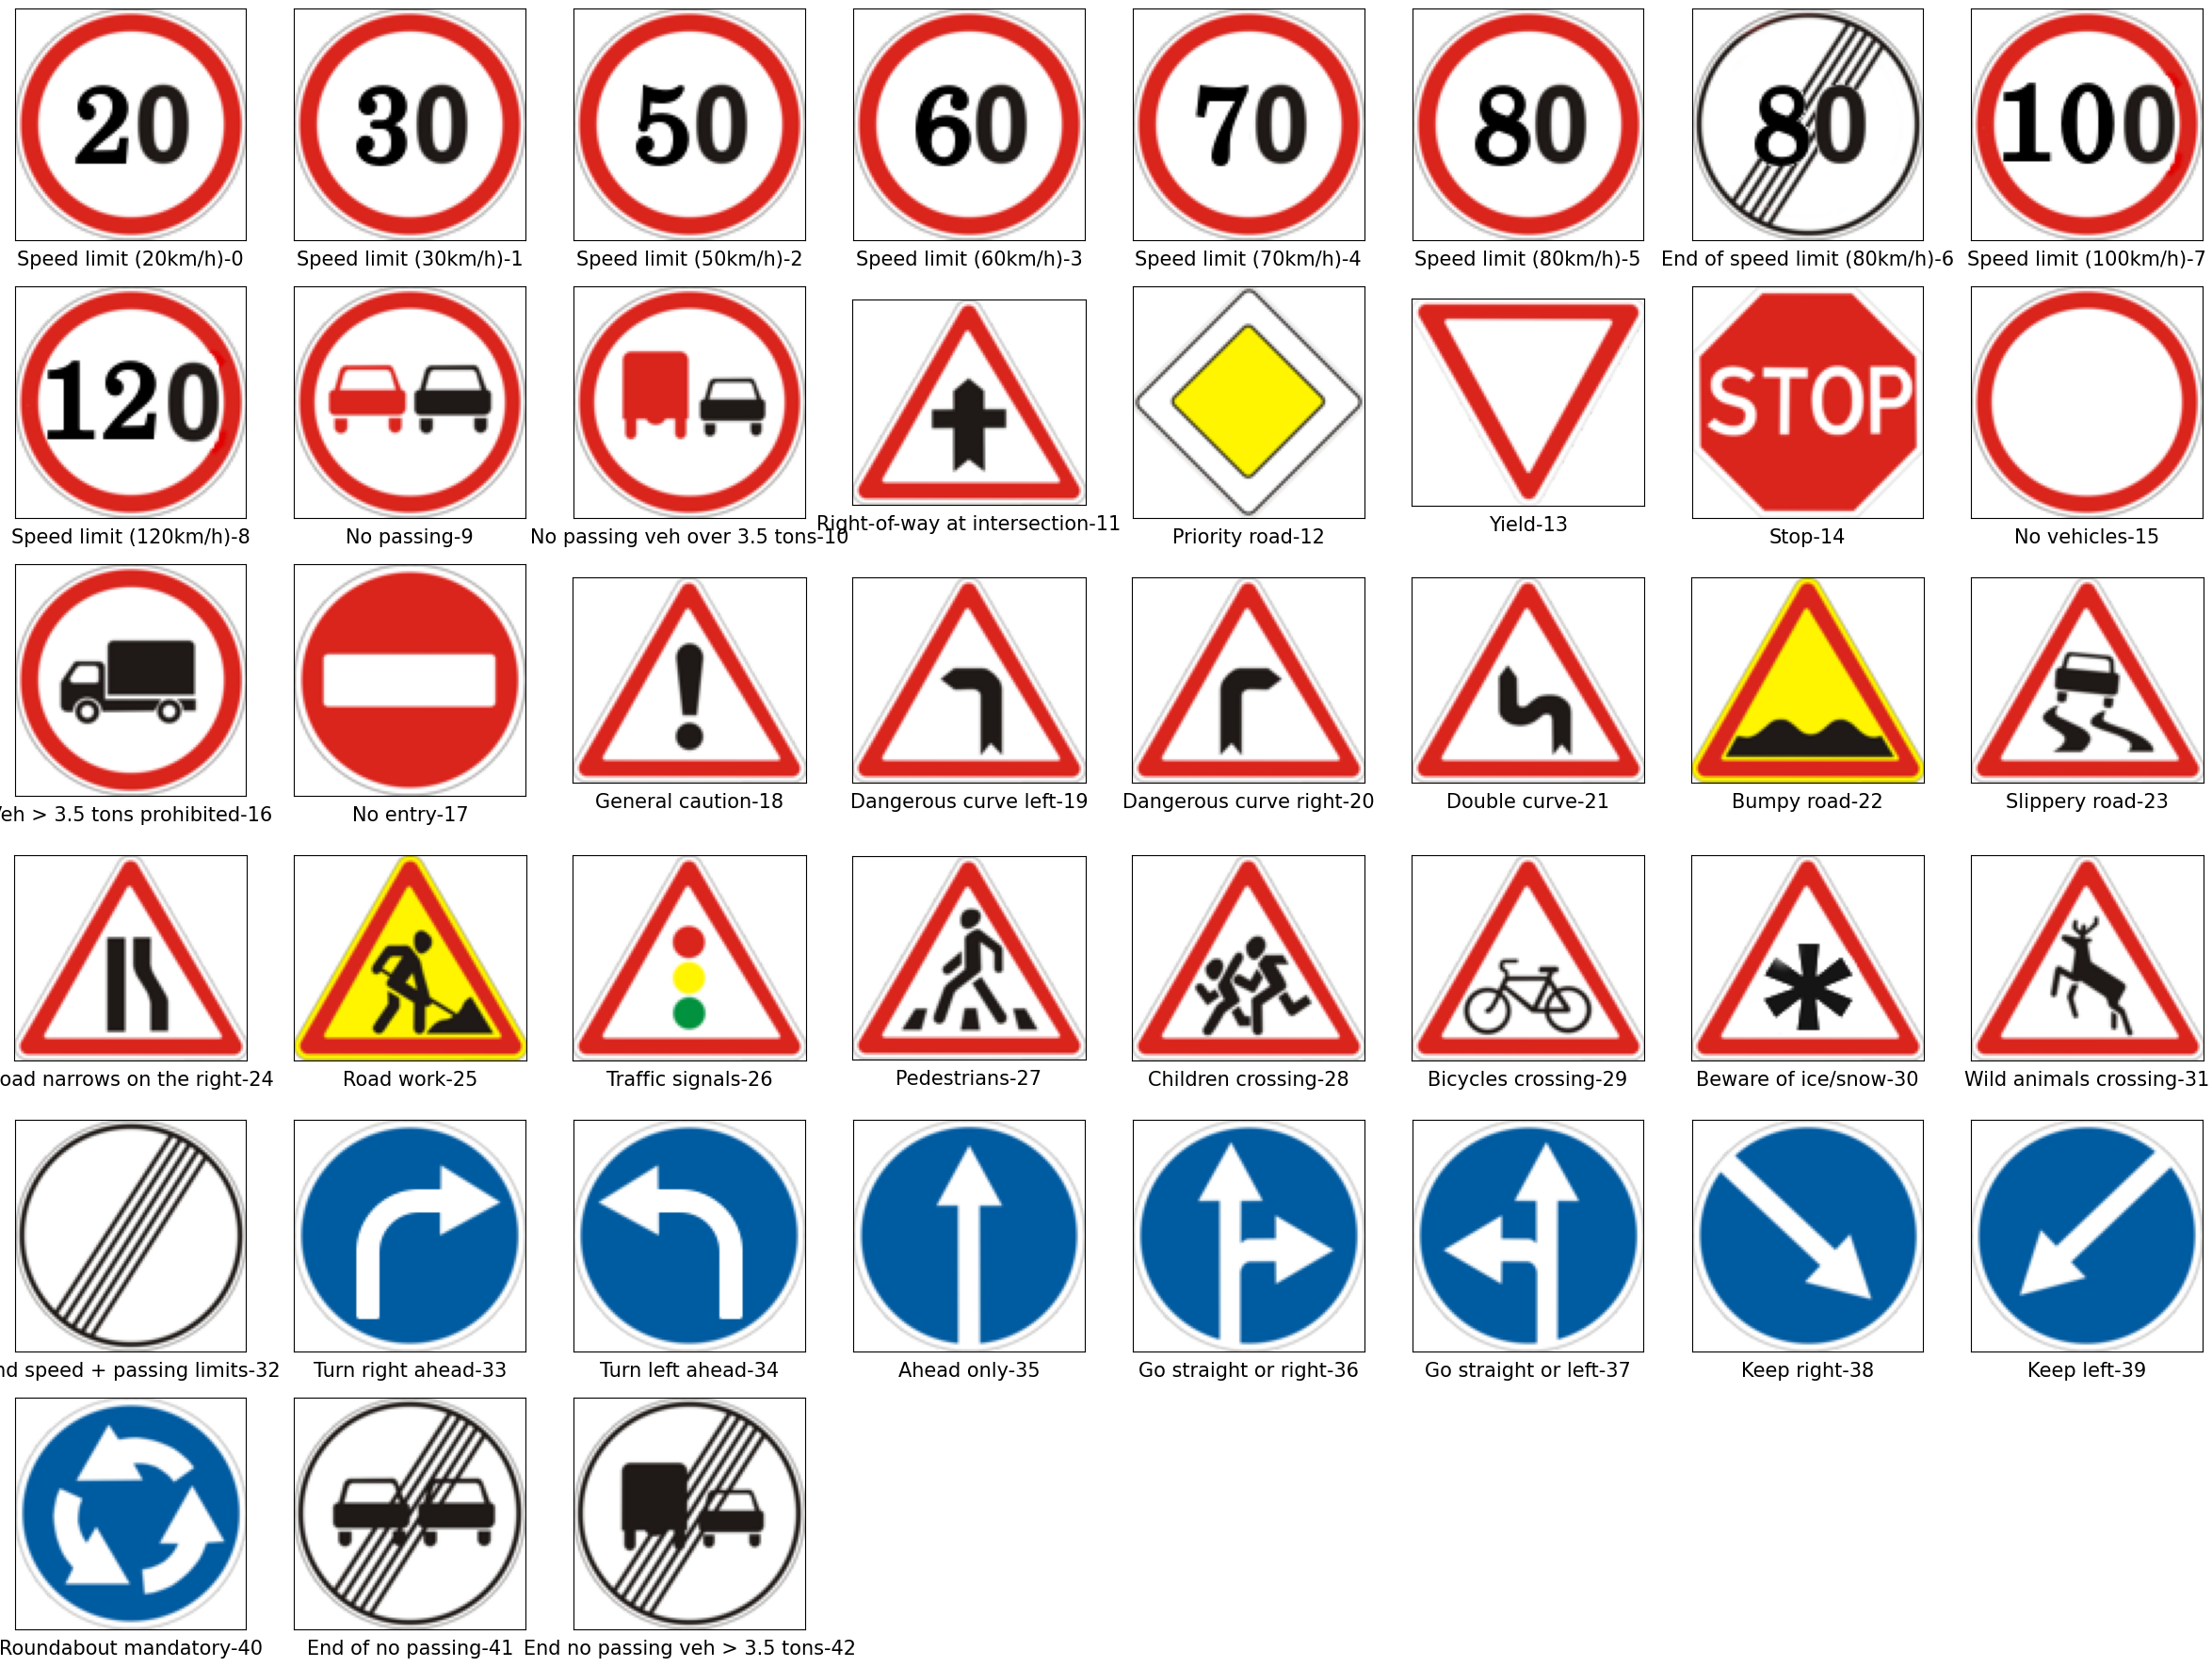

In [13]:
# Let's the data and expected classes to predict 
class_list = train_csv.ClassId.unique()
#print(class_list)

plt.figure(figsize=(30,30))
for i in class_list:
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    path = "gtsrb/meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(classes[i]+"-"+str(i),fontsize = 15)

/tmp/ipykernel_4395/1775512103.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


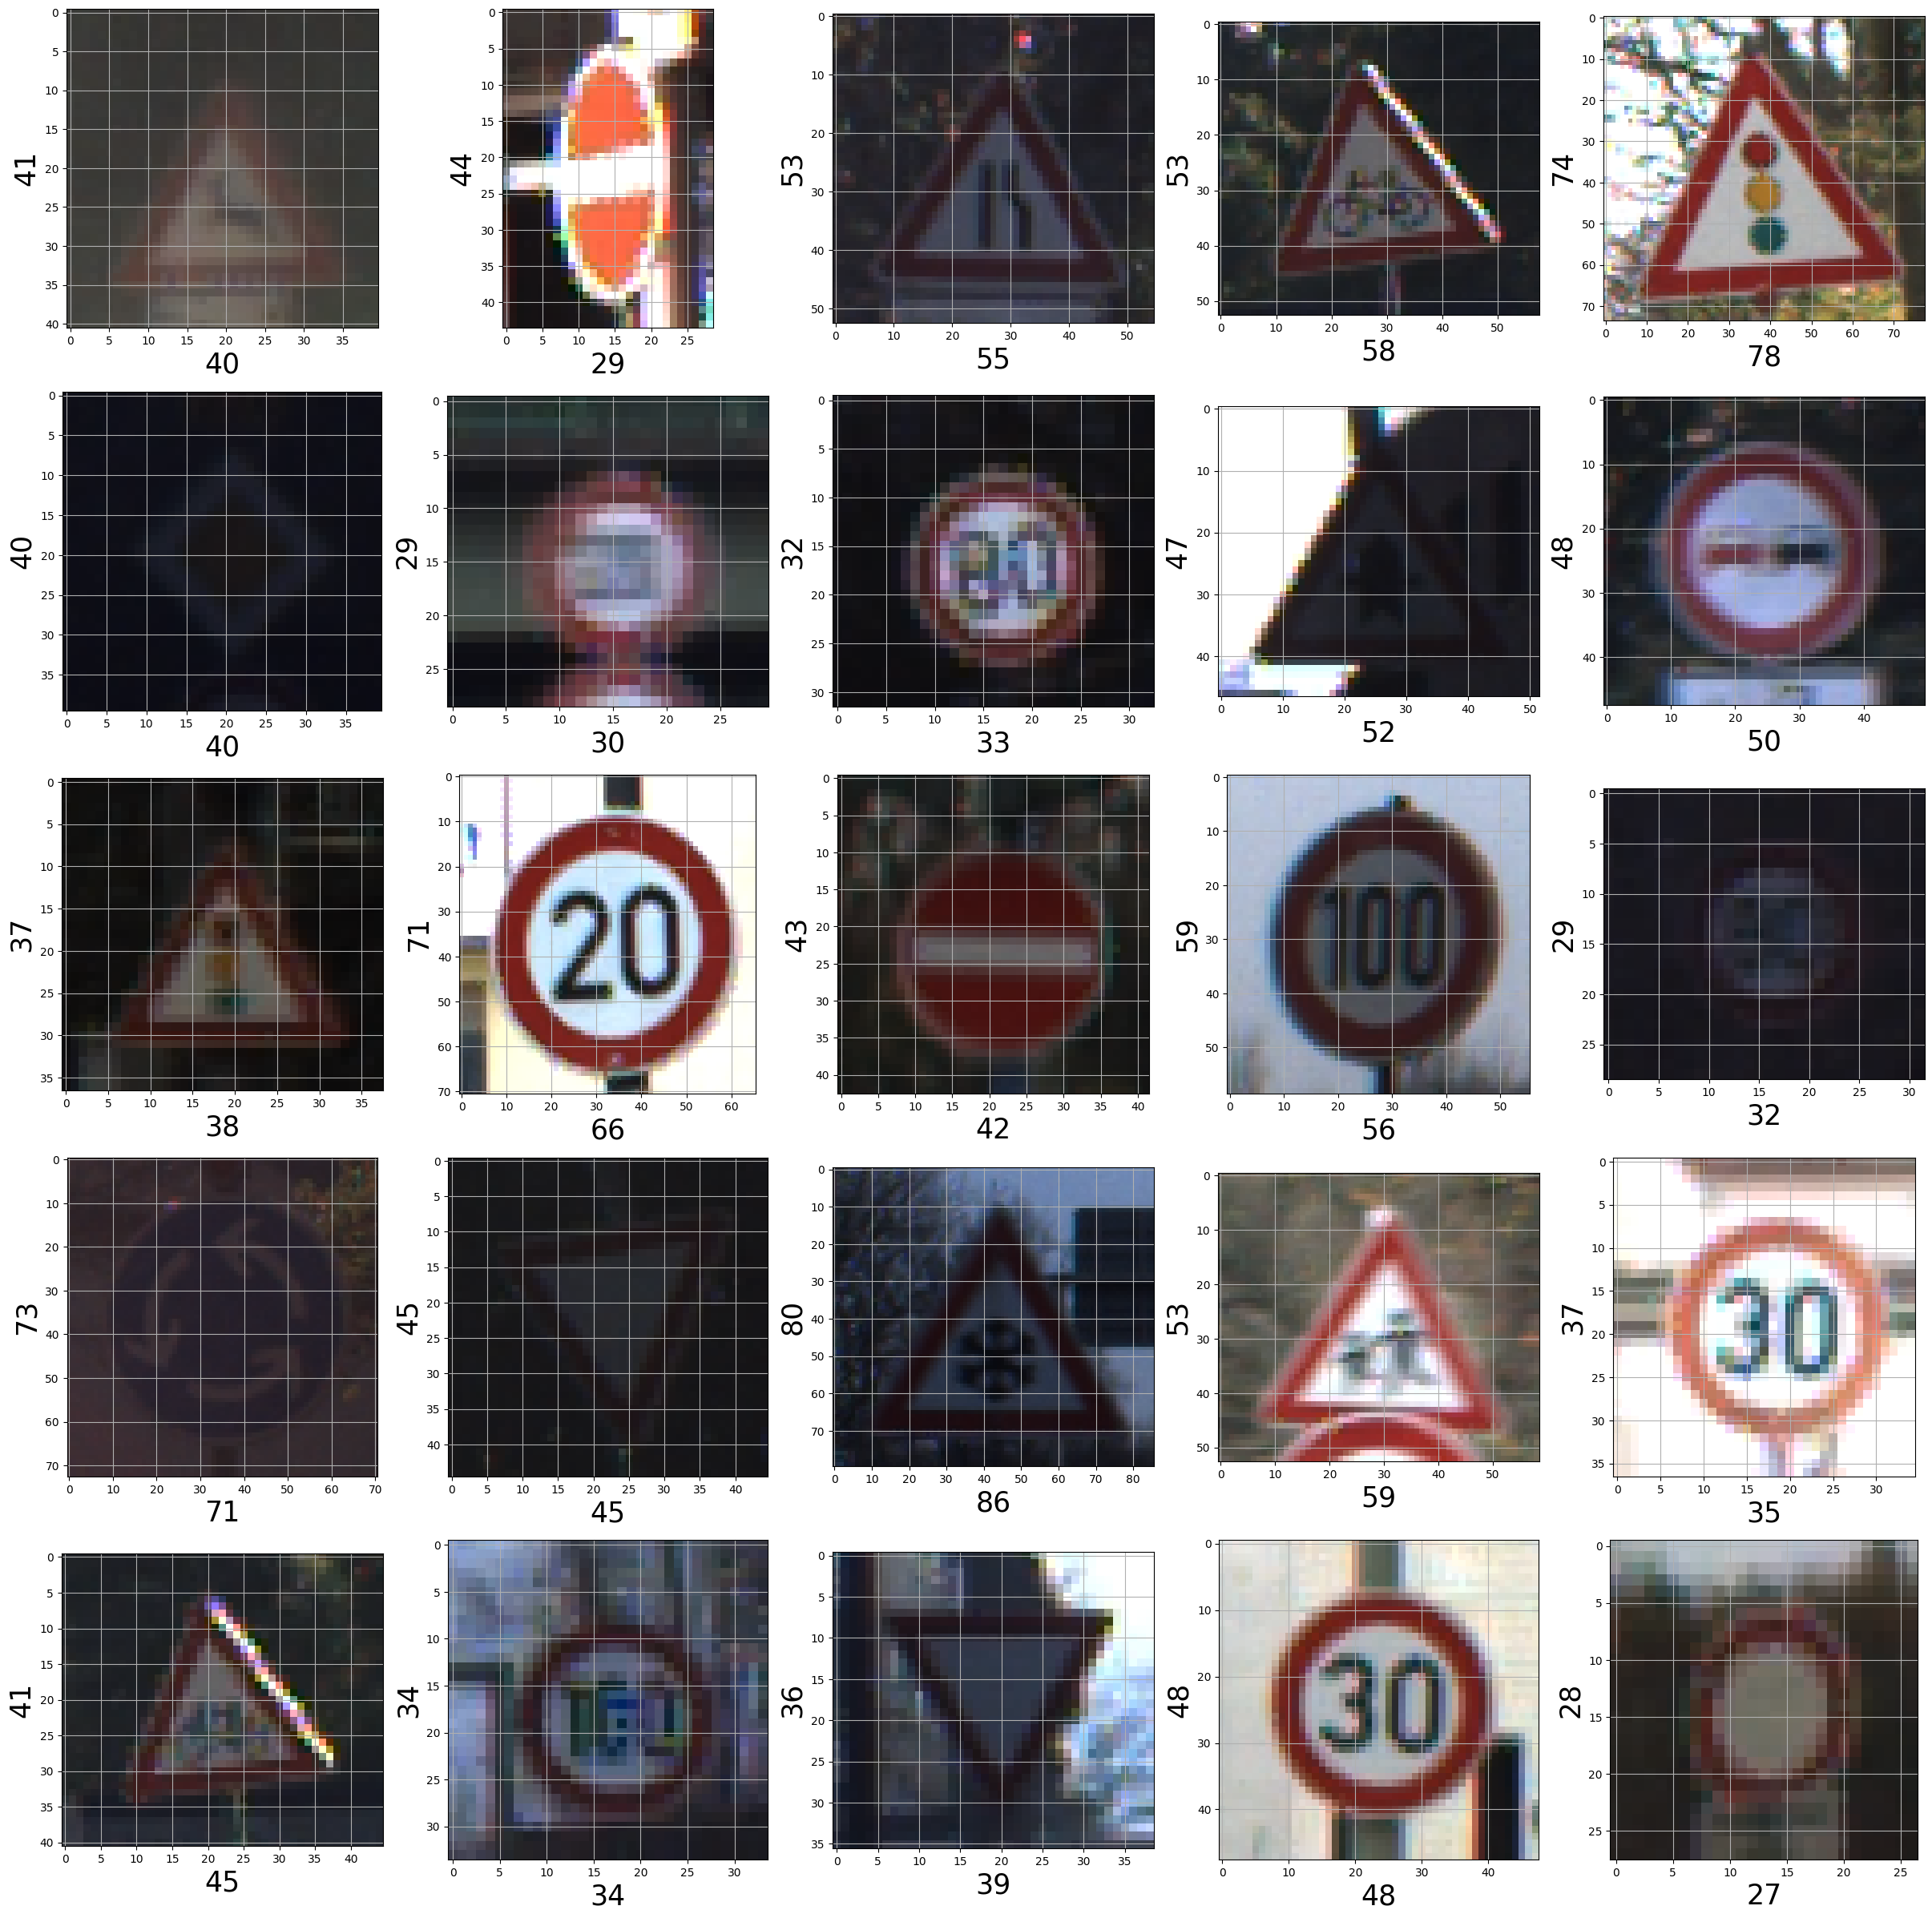

In [14]:
# Let us visualize some random images in a class from the training Data. 
import random
from matplotlib.image import imread


test = pd.read_csv(data_dir + '/Train.csv')
imgs = test["Path"].values

plt.figure(figsize=(30,30))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 25)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 25)#height of image

In [15]:

data_cdis = train_csv.ClassId.value_counts()
data_cdis.sort_index()


0      210
1     2220
2     2250
3     1410
4     1980
5     1860
6      420
7     1440
8     1410
9     1470
10    2010
11    1320
12    2100
13    2160
14     780
15     630
16     420
17    1110
18    1200
19     210
20     360
21     330
22     390
23     510
24     270
25    1500
26     600
27     240
28     540
29     270
30     450
31     780
32     240
33     689
34     420
35    1200
36     390
37     210
38    2070
39     300
40     360
41     240
42     240
Name: ClassId, dtype: int64

Text(0, 0.5, 'Number of Images in each Class')

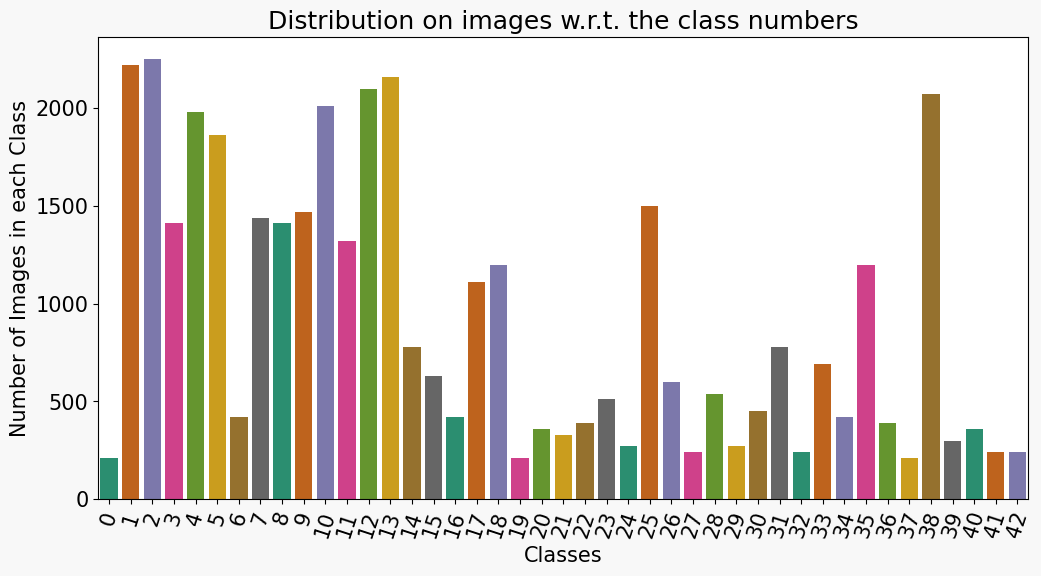

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (20, 20)
matplotlib.rcParams['figure.facecolor'] = '#00000007'




plt.figure(figsize=(12,6))
plt.xticks(rotation=72)
plt.xlabel('Classes')


plt.title('Distribution on images w.r.t. the class numbers')
sns.barplot(x=data_cdis.index, y=data_cdis,palette='Dark2');
plt.ylabel('Number of Images in each Class')

In [17]:
print(train_csv['Height'].max())
print(train_csv['Width'].max())
print(test_csv['Height'].max())
print(test_csv['Width'].max())

225
243
232
266


In [31]:
import warnings

warnings.filterwarnings("ignore")

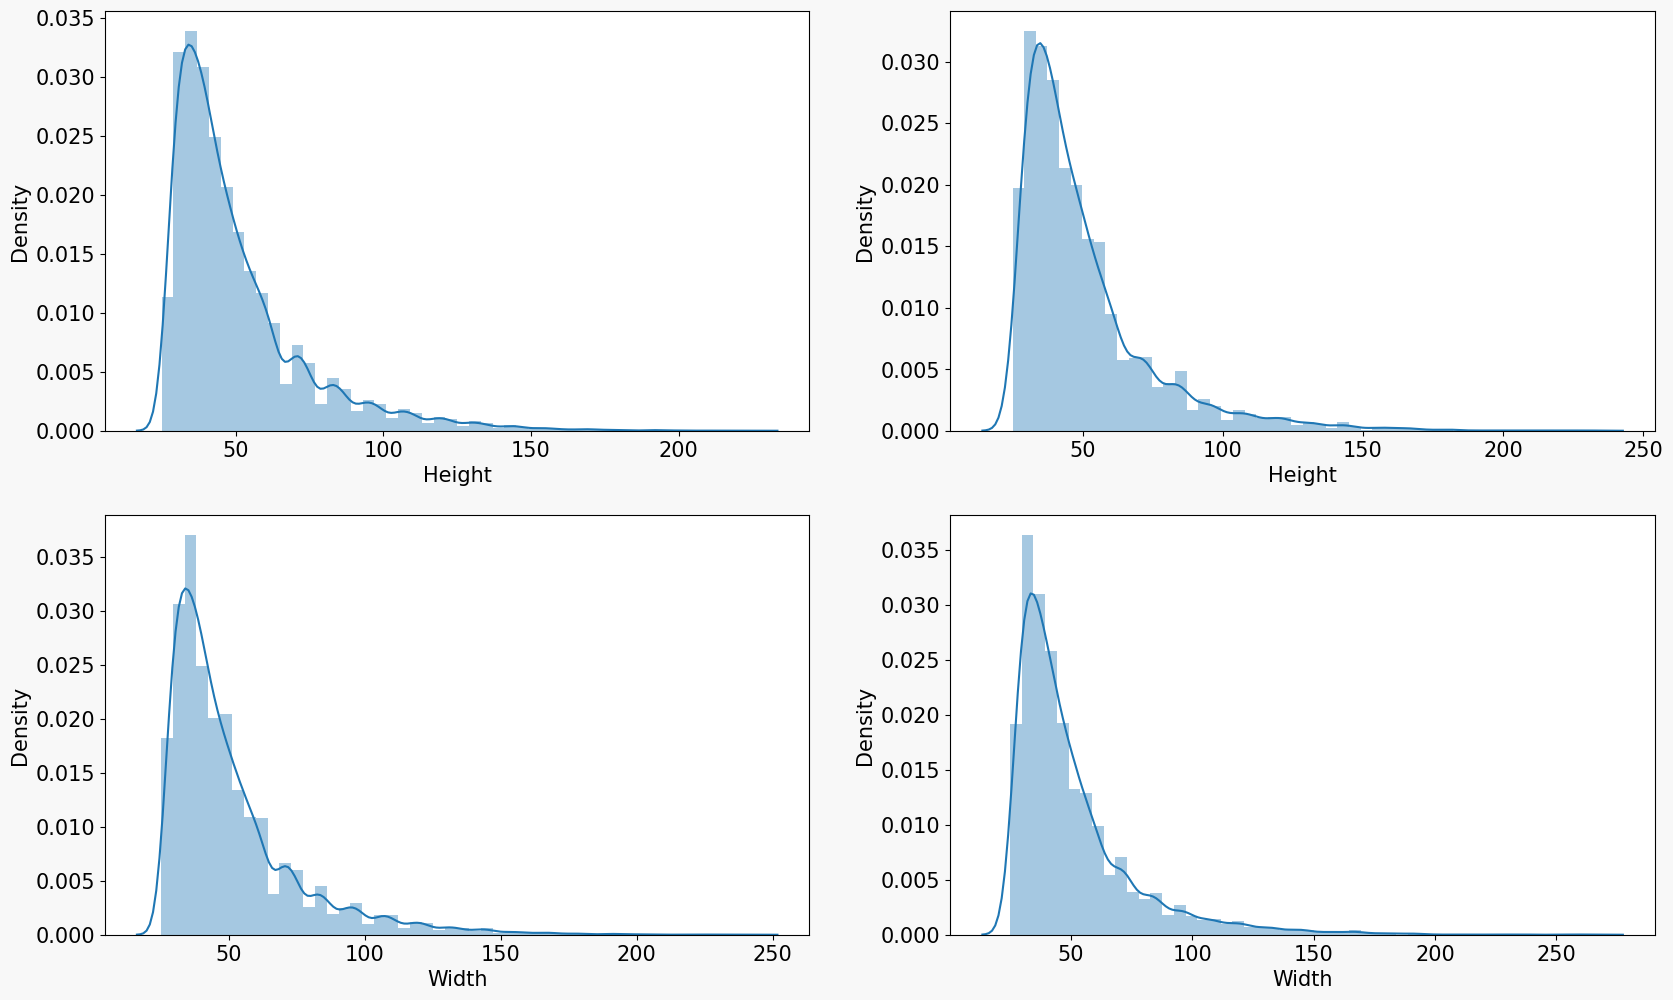

In [35]:

fig, ax = plt.subplots(2, 2)
fig.set_size_inches((20,12))
sns.distplot(train_csv['Height'], ax = ax[0][0])
#fig.set_title('Distribution of Height of an image in train')
fig.set_size_inches((20,12))
sns.distplot(test_csv['Height'], ax = ax[0][1])
fig.set_size_inches((20,12))
sns.distplot(train_csv['Width'], ax = ax[1][0])
fig.set_size_inches((20,12))
sns.distplot(test_csv['Width'], ax = ax[1][1])
plt.show()

In [ ]:
print(train_csv['Height'].mode())
print(train_csv['Width'].mode())
print(test_csv['Height'].mode())
print(test_csv['Width'].mode())

In [37]:
fig.set_size_inches((35,35))
sns.histplot(train_csv['Height'], ax = ax[0][0]).set_title('Monthly Avg Temperatures')
plt.show()